## Import Libraries

In [1]:
import spacy
import pickle
import random
import doc
from spacy import displacy
#!pip install spacy
import warnings
warnings.filterwarnings("ignore")
import glob
import docx
import glob
import warnings
warnings.filterwarnings("ignore")
from spacy import displacy
import docx
from spacy import schemas
from spacy import Dict
from spacy.lang.en.stop_words import  STOP_WORDS
import string
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import textract
#import antiword
from PyPDF2 import PdfFileReader
import re
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
from spacy.matcher import Matcher

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nlp = spacy.load("en_core_web_sm")
import nltk
from spacy.matcher import Matcher

## Import Data
## For Sql developer resumes

In [2]:
path='C:\Excelr Project\Resumes\SQL Developer Lightning insight'
all_files=glob.glob(path + "/*.docx")
all_files

[]

In [3]:
def readtxt(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return '\n'.join(fullText)

In [4]:

li=[]
for filename in all_files:
    dummy_1=readtxt(filename)
    li.append(dummy_1)
    

In [5]:
import pandas as pd

In [6]:
dataframe=pd.DataFrame()

In [7]:
for files in all_files:
    print(files)
    dataframe["cv"]=li

In [8]:
dataframe

Empty DataFrame
Columns: []
Index: []

In [9]:
label_list=[]
for i in range (len(all_files)):
    label="SQLDeveloper"
    label_list.append(label)
    

In [10]:
dataframe["label"]=label_list

In [11]:
dataframe

Empty DataFrame
Columns: [label]
Index: []

## For workday resumes

In [12]:
path1='C:\Excelr Project\Resumes\workday resumes'
all_files1=glob.glob(path1 + "/*.docx")
all_files1

[]

In [13]:
li1=[]
for filename1 in all_files1:
    dummy_11=readtxt(filename1)
    li1.append(dummy_11)

In [14]:
dataframe1=pd.DataFrame()

In [15]:
for files in all_files1:
    print(files)
    dataframe1["cv"]=li1

In [16]:
label_list1=[]
for i in range (len(all_files1)):
    label1="workdayResumes"
    label_list1.append(label1)
    

In [17]:
dataframe1["label"]=label_list1

In [18]:
dataframe1

Empty DataFrame
Columns: [label]
Index: []

## For peoplesoft resumes

In [19]:
path2='C:\Excelr Project\Resumes\Peoplesoft resumes'
all_files2=glob.glob(path2 + "/*.docx")
all_files2

[]

In [20]:
li2=[]
for filename2 in all_files2:
    dummy_12=readtxt(filename2)
    li2.append(dummy_12)

In [21]:
dataframe2=pd.DataFrame()

In [22]:
for files in all_files2:
    print(files)
    dataframe2["cv"]=li2

In [23]:
label_list2=[]
for i in range (len(all_files2)):
    label2="Peoplesoft"
    label_list2.append(label2)
    

In [24]:
dataframe2["label"]=label_list2

In [25]:
dataframe2

Empty DataFrame
Columns: [label]
Index: []

## For React resumes

In [26]:
path3='C:\Excelr Project\Resumes\React Developer'
all_files3=glob.glob(path3 + "/*.docx")
all_files3

[]

In [27]:
li3=[]
for filename3 in all_files3:
    dummy_13=readtxt(filename3)
    li3.append(dummy_13)
   

In [28]:
dataframe3=pd.DataFrame()

In [29]:
for files in all_files3:
    print(files)
    dataframe3["cv"]=li3


In [30]:
label_list3=[]
for i in range (len(all_files3)):
    label3="ReactDeveloper"
    label_list3.append(label3)
    

In [31]:
dataframe3["label"]=label_list3

In [32]:
dataframe3

Empty DataFrame
Columns: [label]
Index: []

## For Internship Resumes

In [33]:
path4='C:\Excelr Project\Resumes\Internship'
all_files4=glob.glob(path4 + "/*.docx")
all_files4

[]

In [34]:
li4=[]
for filename4 in all_files4:
    dummy_14=readtxt(filename4)
    li4.append(dummy_14)
    

In [35]:
dataframe4=pd.DataFrame()

In [36]:
for files in all_files4:
    print(files)
    dataframe4["cv"]=li4

In [37]:
label_list4=[]
for i in range (len(all_files4)):
    label4="Internship"
    label_list4.append(label4)

In [38]:
dataframe4["label"]=label_list4

In [39]:
dataframe4

Empty DataFrame
Columns: [label]
Index: []

## Final dataframe

In [40]:
final=pd.concat([dataframe,dataframe1,dataframe2,dataframe3,dataframe4],axis=0)
final=final.reset_index()
final=final.drop(columns='index',axis=0)
final


Empty DataFrame
Columns: [label]
Index: []

## Different Categories

In [41]:
final.label.value_counts()

Series([], Name: label, dtype: int64)

In [42]:
print ("Displaying the distinct categories of resume -")
print (final.label.unique())

Displaying the distinct categories of resume -
[]


In [43]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category -")
print (final.label
       .value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category -
Series([], Name: label, dtype: int64)


## Bar Plot

ValueError: min() arg is an empty sequence

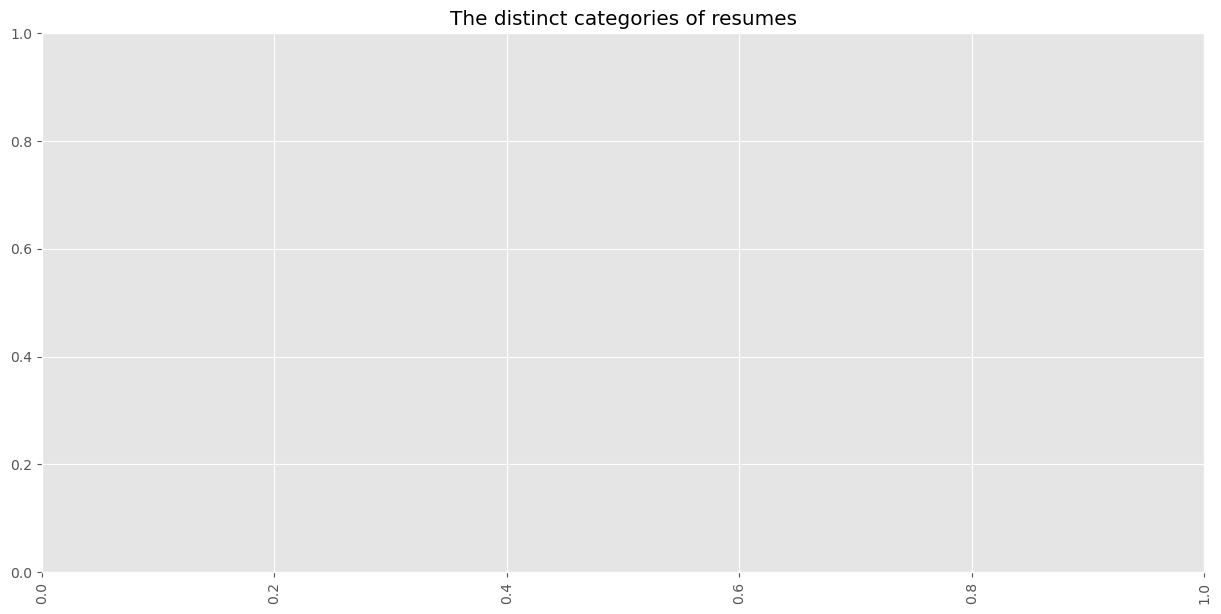

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(15,7))
plt.title("The distinct categories of resumes")
plt.xticks(rotation=90)
sns.countplot(y="label", data=final,color=None)
plt.show()

In [ ]:
import numpy as np

## Pie Plot

In [ ]:
from matplotlib.gridspec import GridSpec
targetCounts = final.label.value_counts()
targetLabels  = final.label.unique()
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('plasma')
colors = [cmap(i) for i in np.linspace(0, 1, 6)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [ ]:
import plotly.express as px

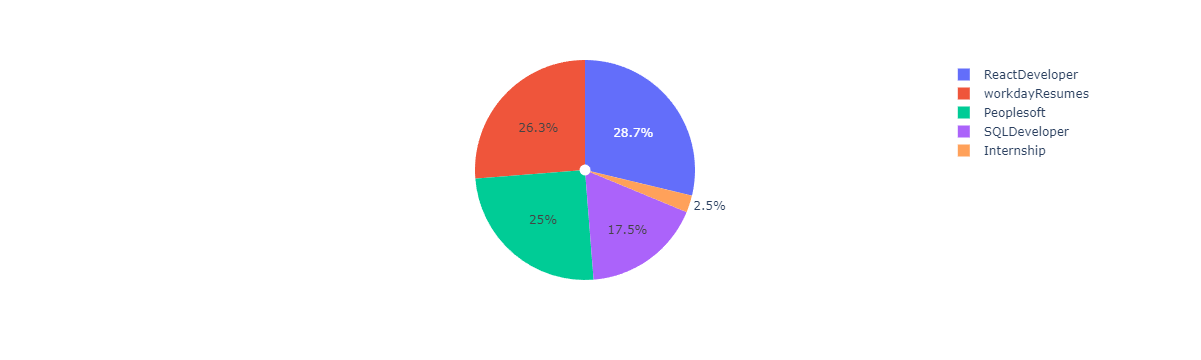

In [48]:
px.pie(data_frame=final,names="label",values=None,hover_name=None,
    hover_data=None,hole=0.05,)

In [49]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

## Exploratory Data Analysis
### Text PreProcessing

In [50]:
stopwords=list(STOP_WORDS)
stopwords

['whole',
 'during',
 "'m",
 'why',
 'used',
 '‘re',
 '‘ll',
 'itself',
 'around',
 'was',
 '’s',
 'twenty',
 'only',
 'beforehand',
 'on',
 'than',
 'rather',
 're',
 'thence',
 'whose',
 'always',
 'however',
 'very',
 'eight',
 'against',
 'without',
 'me',
 'whither',
 'using',
 'again',
 'becomes',
 'part',
 'whenever',
 'can',
 'nor',
 'your',
 'side',
 'himself',
 'up',
 'although',
 'most',
 'every',
 'we',
 'forty',
 'get',
 "'d",
 'are',
 'will',
 'elsewhere',
 'keep',
 'cannot',
 'beside',
 '‘m',
 'may',
 'when',
 'off',
 'fifty',
 'upon',
 'seemed',
 'hundred',
 'these',
 'here',
 'how',
 'hereupon',
 'had',
 'all',
 'even',
 'much',
 'to',
 'ourselves',
 'might',
 'see',
 'over',
 'whereafter',
 'whereas',
 'by',
 '‘ve',
 'thru',
 'somehow',
 'whereby',
 'nine',
 'otherwise',
 'empty',
 'anywhere',
 'whereupon',
 'therein',
 'a',
 'former',
 'this',
 'hereby',
 'third',
 'nothing',
 'perhaps',
 'due',
 'serious',
 'one',
 'in',
 'who',
 'our',
 'so',
 'they',
 'per',
 'the

In [51]:
punct = string.punctuation
print(punct)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


## Cleaning Resume Text

## Segmentation and Lemmatisation and Normalisation
### Create a Function

In [52]:
clean = []
lz = WordNetLemmatizer()
for i in range(final.shape[0]):
    review = re.sub(
        '(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"',
        " ",
        final["cv"].iloc[i],
    )
    review = re.sub(r"[0-9]+", " ", review) # Remove Numbers
    review = review.lower()
    review = review.split()
    lm = WordNetLemmatizer()
    review = [ lz.lemmatize(word) for word in review if word not in STOP_WORDS]
    review = " ".join(review)
    clean.append(review)

In [53]:
final["Clean_Resume"] = clean

In [54]:
final

cv           label  \
0   ANIL KUMAR MADDUKURI  \t\t\nSQL & MSBI Develop...    SQLDeveloper   
1   \nAradhana Tripathi\n\nCurrent Location: Gachi...    SQLDeveloper   
2   BUDDHA VAMSI                                  ...    SQLDeveloper   
3   KAMBALLA PRADEEP                              ...    SQLDeveloper   
4   \n\n\n Hyderabad\n\nNazeer Basha\nSQL and Pow...    SQLDeveloper   
..                                                ...             ...   
75  \nPranish Sonone\n\t\n\n\n\n\nCareer summary:\...  ReactDeveloper   
76  Ranga Gaganam  \n \n \nHaving 1+ years of succ...  ReactDeveloper   
77  SHAIK ABDUL SHARUK   \n2 years’ Experience in ...  ReactDeveloper   
78  Name: Ravali P \n\n                           ...      Internship   
79    \nSUSOVAN  BAG   \nSeeking  a  challenging  ...      Internship   

                                         Clean_Resume  
0   anil kumar maddukuri sql msbi developer summar...  
1   aradhana tripathi current location gachibowli ...  
2   buddha vamsi career objective year experience ...  
3   kamballa pradeep synopsis looking forward aspi...  
4   hyderabad nazeer basha sql power bi developer ...  
..                                                ...  
75  pranish sonone career summary experience year ...  
76  ranga gaganam having year successful experienc...  
77  shaik abdul sharuk year experience wipro caree...  
78  ravali p curriculum vitae specialization compu...  
79  susovan bag seeking challenging position field...  

[80 rows x 3 columns]

In [55]:
final["Clean_Resume"][0]

'anil kumar maddukuri sql msbi developer summary year experience m sql server ssms creating ssis package ssrs report microsoft business intelligence msbi tool expertise type join sub query writing complex query involving multiple table handled data manipulation data consistency creating view trigger synonym hand experience creation optimization debugging stored procedure function familiar writing query cte temporary table table variable good experience set operator like union union intersect assist required data experience manipulate data multiple table report client aggregate function window function string function worked extensively data extraction transformation loading etl process sql server integration service container loop container sequence container load data multiple source file database table expertise task like data flow task execute sql task control flow task execute package task execute process task bulk insert task sends mail task ftp task script task control flow level

## NER (Name Entity Recognition) Using Inbuilt Function of Spacy

In [56]:
nlp = spacy.load("en_core_web_sm")

In [57]:
text=nlp(final["Clean_Resume"][1])

In [58]:
displacy.render(text, style = "ent")

In [59]:
for ent in text.ents:
  print(f'{ent.label_.upper():{20}} - {ent.text}')

PERSON               - aradhana tripathi
DATE                 - year
PERSON               - jigyasa analytics
ORG                  - mar project detail
ORG                  - mca computer application information technology


## Creating WordCloud

In [60]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub(r"[0-9]+", " ", resumeText)
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

[('experience', 562), ('server', 476), ('application', 465), ('report', 448), ('peoplesoft', 395), ('workday', 367), ('integration', 347), ('project', 317), ('data', 305), ('process', 280), ('database', 270), ('business', 256), ('sql', 235), ('system', 234), ('knowledge', 226), ('web', 204), ('tool', 189), ('worked', 189), ('requirement', 189), ('client', 187), ('environment', 183), ('good', 180), ('involved', 173), ('role', 167), ('like', 165), ('skill', 163), ('service', 162), ('creating', 157), ('team', 157), ('user', 155), ('support', 155), ('development', 153), ('testing', 151), ('working', 150), ('hcm', 150), ('change', 144), ('technical', 140), ('technology', 139), ('design', 138), ('issue', 136), ('people', 133), ('domain', 130), ('created', 128), ('responsibility', 128), ('production', 128), ('security', 123), ('eib', 123), ('react', 123), ('management', 121), ('oracle', 116)]


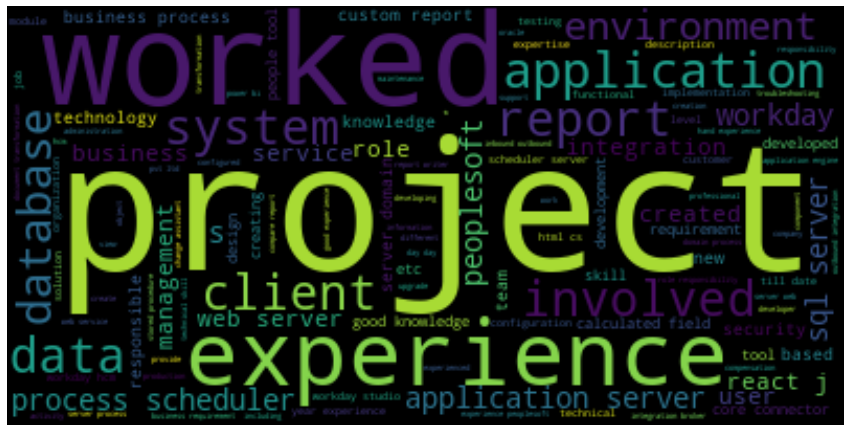

In [61]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = final.Clean_Resume
cleanedSentences = ""
for i in range(len(final.Clean_Resume)):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Most Frequent Words

In [62]:
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 562), ('server', 476), ('application', 465), ('report', 448), ('peoplesoft', 395), ('workday', 367), ('integration', 347), ('project', 317), ('data', 305), ('process', 280), ('database', 270), ('business', 256), ('sql', 235), ('system', 234), ('knowledge', 226), ('web', 204), ('tool', 189), ('worked', 189), ('requirement', 189), ('client', 187), ('environment', 183), ('good', 180), ('involved', 173), ('role', 167), ('like', 165), ('skill', 163), ('service', 162), ('creating', 157), ('team', 157), ('user', 155), ('support', 155), ('development', 153), ('testing', 151), ('working', 150), ('hcm', 150), ('change', 144), ('technical', 140), ('technology', 139), ('design', 138), ('issue', 136), ('people', 133), ('domain', 130), ('created', 128), ('responsibility', 128), ('production', 128), ('security', 123), ('eib', 123), ('react', 123), ('management', 121), ('oracle', 116)]


In [63]:
from collections import Counter

In [64]:
import seaborn as sns

In [65]:
def wordBarGraphFunction(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.style.use('fivethirtyeight')
    plt.barh(range(20), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:20])],color=["g","b","r","m"])
    plt.yticks([x + 0.5 for x in range(20)], reversed(popular_words_nonstop[0:20]))
    plt.title(title)
    plt.show()

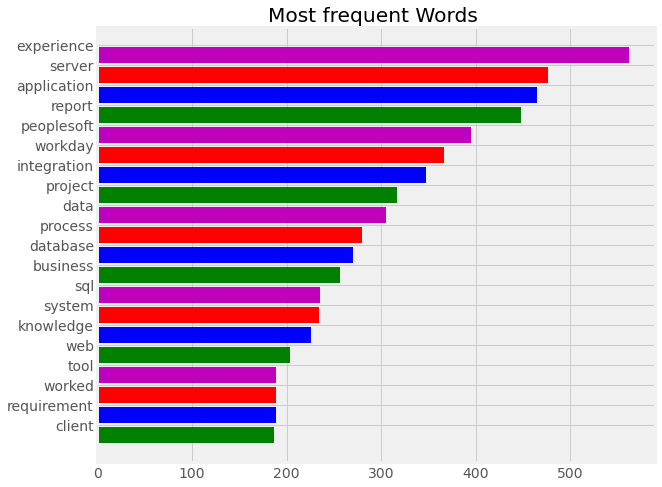

In [66]:
plt.figure(figsize=(10,8))
wordBarGraphFunction(final,"Clean_Resume","Most frequent Words ")

In [67]:
def wordBarGraphFunction_1(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.style.use('fivethirtyeight')
    sns.barplot(x=np.arange(20),y= [word_count_dict[w] for w in reversed(popular_words_nonstop[0:20])])
    plt.xticks([x + 0.5 for x in range(20)], reversed(popular_words_nonstop[0:20]),rotation=90)
    plt.title(title)
    plt.show()

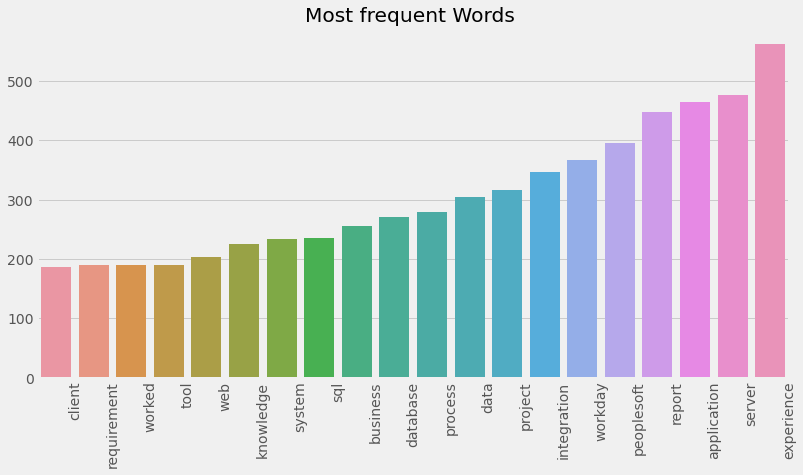

In [68]:
plt.figure(figsize=(12,6))
wordBarGraphFunction_1(final,"Clean_Resume","Most frequent Words ")

## Final DataFrame

In [69]:
resume_data=pd.DataFrame()

In [70]:
resume_data["Resume"]=final["Clean_Resume"]
resume_data["category"]=final["label"]

In [71]:
resume_data

Resume        category
0   anil kumar maddukuri sql msbi developer summar...    SQLDeveloper
1   aradhana tripathi current location gachibowli ...    SQLDeveloper
2   buddha vamsi career objective year experience ...    SQLDeveloper
3   kamballa pradeep synopsis looking forward aspi...    SQLDeveloper
4   hyderabad nazeer basha sql power bi developer ...    SQLDeveloper
..                                                ...             ...
75  pranish sonone career summary experience year ...  ReactDeveloper
76  ranga gaganam having year successful experienc...  ReactDeveloper
77  shaik abdul sharuk year experience wipro caree...  ReactDeveloper
78  ravali p curriculum vitae specialization compu...      Internship
79  susovan bag seeking challenging position field...      Internship

[80 rows x 2 columns]

## Labeling

In [72]:
from sklearn.preprocessing import LabelEncoder
le_encoder=LabelEncoder()

In [73]:
resume_data["Encoded_Skill"]=le_encoder.fit_transform(resume_data["category"])

In [74]:
resume_data

Resume        category  \
0   anil kumar maddukuri sql msbi developer summar...    SQLDeveloper   
1   aradhana tripathi current location gachibowli ...    SQLDeveloper   
2   buddha vamsi career objective year experience ...    SQLDeveloper   
3   kamballa pradeep synopsis looking forward aspi...    SQLDeveloper   
4   hyderabad nazeer basha sql power bi developer ...    SQLDeveloper   
..                                                ...             ...   
75  pranish sonone career summary experience year ...  ReactDeveloper   
76  ranga gaganam having year successful experienc...  ReactDeveloper   
77  shaik abdul sharuk year experience wipro caree...  ReactDeveloper   
78  ravali p curriculum vitae specialization compu...      Internship   
79  susovan bag seeking challenging position field...      Internship   

    Encoded_Skill  
0               3  
1               3  
2               3  
3               3  
4               3  
..            ...  
75              2  
76              2  
77              2  
78              0  
79              0  

[80 rows x 3 columns]

In [75]:
# saving the dataframe
#resume_data.to_csv('resume.csv')

In [76]:
resume_data.isna().sum()

Resume           0
category         0
Encoded_Skill    0
dtype: int64

In [77]:
resume_data.describe()

Encoded_Skill
count      80.000000
mean        2.400000
std         1.197043
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         4.000000

In [78]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Resume         80 non-null     object
 1   category       80 non-null     object
 2   Encoded_Skill  80 non-null     int32 
dtypes: int32(1), object(2)
memory usage: 1.7+ KB


## Vectorization

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [80]:
requiredText = resume_data["Resume"].values
requiredTarget = resume_data["Encoded_Skill"].values

## TF-IDF

In [81]:
word_vectorizer = TfidfVectorizer(smooth_idf=True,analyzer='word',
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,stratify=requiredTarget,shuffle = True,random_state=10, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(56, 1500)
(24, 1500)


In [82]:
X_train.shape,y_train.shape

((56, 1500), (56,))

In [83]:
print("X_train:\n",X_train)
print("---------------------------------------------")
print("X_test:\n",X_test)

X_train:
   (0, 1498)	0.021332814731557286
  (0, 1485)	0.07223668727457203
  (0, 1483)	0.02418661790760736
  (0, 1480)	0.02829200424971022
  (0, 1473)	0.06326669933771713
  (0, 1472)	0.03680936385685877
  (0, 1469)	0.11653263460333706
  (0, 1464)	0.08228122590015623
  (0, 1429)	0.06667071269079673
  (0, 1425)	0.06581513706564616
  (0, 1421)	0.07443136528765011
  (0, 1417)	0.08259676606079691
  (0, 1415)	0.05258646932521699
  (0, 1398)	0.043960363364887574
  (0, 1376)	0.06643477145721519
  (0, 1375)	0.05900801953414286
  (0, 1360)	0.06875709251549557
  (0, 1349)	0.023881252459486326
  (0, 1341)	0.12001760345464053
  (0, 1332)	0.06581513706564616
  (0, 1324)	0.07907328213596401
  (0, 1319)	0.02717994602198003
  (0, 1289)	0.13881395882338263
  (0, 1278)	0.07649536707814632
  (0, 1250)	0.2022778460494903
  :	:
  (55, 304)	0.16615358323417298
  (55, 249)	0.05167851019193958
  (55, 244)	0.09340598019208315
  (55, 241)	0.05640551285089473
  (55, 236)	0.04554972102347287
  (55, 212)	0.07143831

## Model Building

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score,accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import plotly as py
from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode(connected=True)
import plotly.graph_objs as go

## Support Vector Machine

In [85]:
svm = OneVsRestClassifier(SVC(C=1.0,kernel='linear',degree=3,gamma='scale',class_weight ='balanced'))
svm.fit(X_train, y_train)
svm_prediction = svm.predict(X_test)
svm_score = svm.score(X_test, y_test)
print("SVM Classification Train Accuracy: {}%".format(round(svm.score(X_train,y_train)*100,2)))
print("SVM Classification Test Accuracy: {}%".format(round(svm.score(X_test,y_test)*100,2)))
svm_cm = confusion_matrix(y_test, svm_prediction)

print("Classification Report:\n")

print(classification_report(y_test, svm_prediction))

SVM Classification Train Accuracy: 98.21%
SVM Classification Test Accuracy: 95.83%
Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         6
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         6

    accuracy                           0.96        24
   macro avg       0.78      0.80      0.79        24
weighted avg       0.92      0.96      0.94        24



### Naive Bayes Classifier

In [86]:
clf =MultinomialNB(alpha=1, fit_prior=False, class_prior=None).fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of MultinomialNB Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of MultinomialNB Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))
nb_score = clf.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, prediction)

Accuracy of MultinomialNB Classifier on training set: 0.98
Accuracy of MultinomialNB Classifier on test set: 0.96
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         6
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         6

    accuracy                           0.96        24
   macro avg       0.78      0.80      0.79        24
weighted avg       0.92      0.96      0.94        24




## Decision Tree Classifier

In [87]:
dt = DecisionTreeClassifier(criterion='entropy',class_weight = "balanced",splitter='best',max_depth=None)
dt.fit(X_train, y_train)
dt_prediction = dt.predict(X_test)
dt_score = dt.score(X_test, y_test)
print("Decision Tree Classification Train Accuracy: {}%".format(round(dt.score(X_train,y_train)*100,2)))
print("Decision Tree Classification Test Accuracy: {}%".format(round(dt.score(X_test,y_test)*100,2)))
dt_cm = confusion_matrix(y_test, dt_prediction)

print("Classification Report:\n")

print(classification_report(y_test, dt_prediction))

Decision Tree Classification Train Accuracy: 98.21%
Decision Tree Classification Test Accuracy: 91.67%
Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.83      0.91         6
           2       0.88      1.00      0.93         7
           3       0.80      1.00      0.89         4
           4       1.00      1.00      1.00         6

    accuracy                           0.92        24
   macro avg       0.73      0.77      0.75        24
weighted avg       0.89      0.92      0.90        24



## KNeighbors Classifier

In [102]:
knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5, weights='uniform',p=2,metric='minkowski',algorithm='brute'))
knn.fit(X_train, y_train)
knn_prediction = knn.predict(X_test)
knn_score = knn.score(X_test, y_test)
print("KNN Classification Train Accuracy: {}%".format(round(knn.score(X_train,y_train)*100,2)))
print("KNN Classification Test Accuracy: {}%".format(round(knn.score(X_test,y_test)*100,2)))
knn_cm = confusion_matrix(y_test, knn_prediction)

print('Classification Report:\n')

print(classification_report(y_test, knn_prediction))

KNN Classification Train Accuracy: 94.64%
KNN Classification Test Accuracy: 95.83%
Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         6
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         6

    accuracy                           0.96        24
   macro avg       0.78      0.80      0.79        24
weighted avg       0.92      0.96      0.94        24



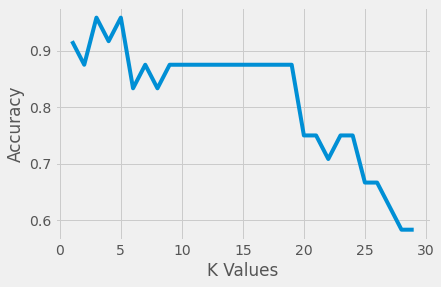

In [89]:
#Find Best K Value

score_list = []
for each in range(1,30):
    knn2 =OneVsRestClassifier(KNeighborsClassifier(n_neighbors=each, weights='uniform',p=2,metric='minkowski',algorithm='brute'))
    knn2.fit(X_train, y_train)
    score_list.append(knn2.score(X_test, y_test))
plt.plot(range(1,30), score_list)
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.show()

## Random Forest Classifier

In [90]:
rf =RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=3,max_features='auto',random_state=None,
 class_weight="balanced")
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)
rf_score = rf.score(X_test, y_test)
print("Random Forest Classification Train Accuracy: {}%".format(round(rf.score(X_train,y_train)*100,2)))
print("Random Forest Classification Test Accuracy: {}%".format(round(rf.score(X_test,y_test)*100,2)))
rf_cm = confusion_matrix(y_test, rf_prediction)
print("Classification Report:\n")
print(classification_report(y_test, rf_prediction))

Random Forest Classification Train Accuracy: 98.21%
Random Forest Classification Test Accuracy: 95.83%
Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         6
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         6

    accuracy                           0.96        24
   macro avg       0.78      0.80      0.79        24
weighted avg       0.92      0.96      0.94        24



### Hyper Parameter Tweaking:
### Grid_Search CV

In [91]:
from sklearn.model_selection import GridSearchCV

grid_search_ = GridSearchCV(estimator =rf,param_grid = {'criterion':['entropy','gini'],
                                                                'max_depth':[1,2,3,4,5,6,7,8,9,10]},
                              cv=5)
grid_search_.fit(X_train,y_train)
print(grid_search_.best_params_)
print(grid_search_.best_score_)

{'criterion': 'gini', 'max_depth': 2}
0.9651515151515152


In [92]:
train_accuracy_1=[]
test_accuracy_1=[]
for depth in range(1,10):
    model_2=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=depth,max_features='auto',random_state=None,
 class_weight="balanced")
    model_2.fit(X_train,y_train)
    train_accuracy_1.append(model_2.score(X_train,y_train))
    test_accuracy_1.append(model_2.score(X_test,y_test))

Text(0, 0.5, 'performance')

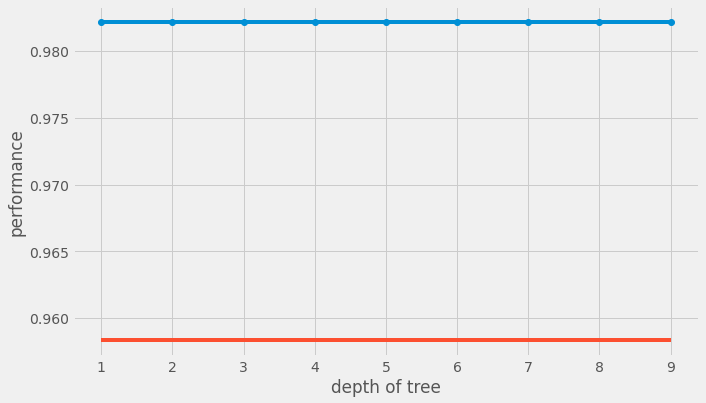

In [93]:
frame_1=pd.DataFrame({'max_depth':range(1,10),'train_acc':train_accuracy_1,'test_acc':test_accuracy_1})
plt.figure(figsize=(10,6))
plt.plot(frame_1["max_depth"],frame_1["train_acc"],marker='o')
plt.plot(frame_1["max_depth"],frame_1["test_acc"])
plt.xlabel("depth of tree")
plt.ylabel("performance")

## AdaBoost Classifier

In [94]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)
ab_score= ab_clf.score(X_test, y_test)
ab_prediction = ab_clf.predict(X_test)
print("AdaBoost Classifier Train Accuracy: {}%".format(round(ab_clf.score(X_train,y_train)*100,2)))
print("AdaBoost Classifier Test Accuracy: {}%".format(round(ab_clf.score(X_test,y_test)*100,2)))      
ab_cm = confusion_matrix(y_test, ab_prediction)
print("Classification Report:\n")
print(classification_report(y_test, ab_prediction))

AdaBoost Classifier Train Accuracy: 73.21%
AdaBoost Classifier Test Accuracy: 66.67%
Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         6
           2       0.50      1.00      0.67         7
           3       0.80      1.00      0.89         4
           4       1.00      0.83      0.91         6

    accuracy                           0.67        24
   macro avg       0.46      0.57      0.49        24
weighted avg       0.53      0.67      0.57        24



## Gradient Boosting Classifier

In [95]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_score=gb_clf.score(X_test, y_test)
gb_prediction = gb_clf.predict(X_test)
print("Gradient Boosting Classifier Train Accuracy: {}%".format(round(gb_clf.score(X_train,y_train)*100,2)))
print("Gradient Boosting Classifier Test Accuracy: {}%".format(round(gb_clf.score(X_test,y_test)*100,2)))      
gb_cm = confusion_matrix(y_test, gb_prediction)
print("Classification Report:\n")
print(classification_report(y_test, gb_prediction))

Gradient Boosting Classifier Train Accuracy: 98.21%
Gradient Boosting Classifier Test Accuracy: 87.5%
Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.67      0.80         6
           2       0.78      1.00      0.88         7
           3       0.80      1.00      0.89         4
           4       1.00      1.00      1.00         6

    accuracy                           0.88        24
   macro avg       0.72      0.73      0.71        24
weighted avg       0.86      0.88      0.85        24



## Xtreme Gradient Boosting Classifier

In [96]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
xgb_score=xgb_clf.score(X_test, y_test)
xgb_prediction = xgb_clf.predict(X_test)
print("Xtreme Gradient Boosting Classifier Train Accuracy: {}%".format(round(xgb_clf.score(X_train,y_train)*100,2)))
print("Xtreme Gradient Boosting Classifier Test Accuracy: {}%".format(round(xgb_clf.score(X_test,y_test)*100,2)))      
xgb_cm = confusion_matrix(y_test, xgb_prediction)
print("Classification Report:\n")
print(classification_report(y_test, xgb_prediction))

Xtreme Gradient Boosting Classifier Train Accuracy: 98.21%
Xtreme Gradient Boosting Classifier Test Accuracy: 95.83%
Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         6
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         6

    accuracy                           0.96        24
   macro avg       0.78      0.80      0.79        24
weighted avg       0.92      0.96      0.94        24



## Light Gradient Boosting Classifier

In [97]:
lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)
lgb_score=lgb_clf.score(X_test, y_test)
lgb_prediction = lgb_clf.predict(X_test)
print("Light Gradient Boosting Classifier Train Accuracy: {}%".format(round(lgb_clf.score(X_train,y_train)*100,2)))
print("Light Gradient Boosting Classifier Test Accuracy: {}%".format(round(lgb_clf.score(X_test,y_test)*100,2)))      
lgb_cm = confusion_matrix(y_test, lgb_prediction)
print("Classification Report:\n")
print(classification_report(y_test, lgb_prediction))

Light Gradient Boosting Classifier Train Accuracy: 98.21%
Light Gradient Boosting Classifier Test Accuracy: 95.83%
Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         6
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         6

    accuracy                           0.96        24
   macro avg       0.78      0.80      0.79        24
weighted avg       0.92      0.96      0.94        24



In [98]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [99]:
TN = [knn_cm[0,0], svm_cm[0,0], nb_cm[0,0], dt_cm[0,0], rf_cm[0,0], ab_cm[0,0], gb_cm[0,0], xgb_cm[0,0], lgb_cm[0,0]]
FP = [knn_cm[0,1], svm_cm[0,1], nb_cm[0,1], dt_cm[0,1], rf_cm[0,1], ab_cm[0,1], gb_cm[0,1], xgb_cm[0,1], lgb_cm[0,1]]
FN = [knn_cm[1,0], svm_cm[1,0], nb_cm[1,0], dt_cm[1,0], rf_cm[1,0], ab_cm[1,0], gb_cm[1,0], xgb_cm[1,0], lgb_cm[1,0]]
TP = [knn_cm[1,1], svm_cm[1,1], nb_cm[1,1], dt_cm[1,1], rf_cm[1,1], ab_cm[1,1], gb_cm[1,1], xgb_cm[1,1], lgb_cm[1,1]]
Accuracy = [knn_score, svm_score, nb_score, dt_score, rf_score, ab_score, gb_score, xgb_score, lgb_score]
Classification = ["KNN Classification", "SVM Classification", "Naive Bayes Classification", 
                  "Decision Tree Classification", "Random Forest Classification","AdaBoost Classifier","GradientBoosting Classifier",
                   "Xtreme Gradient Boosting Classifier", "Light Gradient Boosting Classifier"]
list_matrix = [Classification, TN, FP, FN, TP, Accuracy]
list_headers = ["Model", "TN", "FP", "FN", "TP", "Accuracy"]
zipped = list(zip(list_headers, list_matrix))
data_dict = dict(zipped)
df_1=pd.DataFrame(data_dict)

In [100]:
df_1

Model  TN  FP  FN  TP  Accuracy
0                   KNN Classification   0   0   0   3  0.833333
1                   SVM Classification   0   0   0   6  0.958333
2           Naive Bayes Classification   0   0   0   6  0.958333
3         Decision Tree Classification   0   0   0   5  0.916667
4         Random Forest Classification   0   0   0   6  0.958333
5                  AdaBoost Classifier   0   0   0   0  0.666667
6          GradientBoosting Classifier   0   0   0   4  0.875000
7  Xtreme Gradient Boosting Classifier   0   0   0   6  0.958333
8   Light Gradient Boosting Classifier   0   0   0   6  0.958333

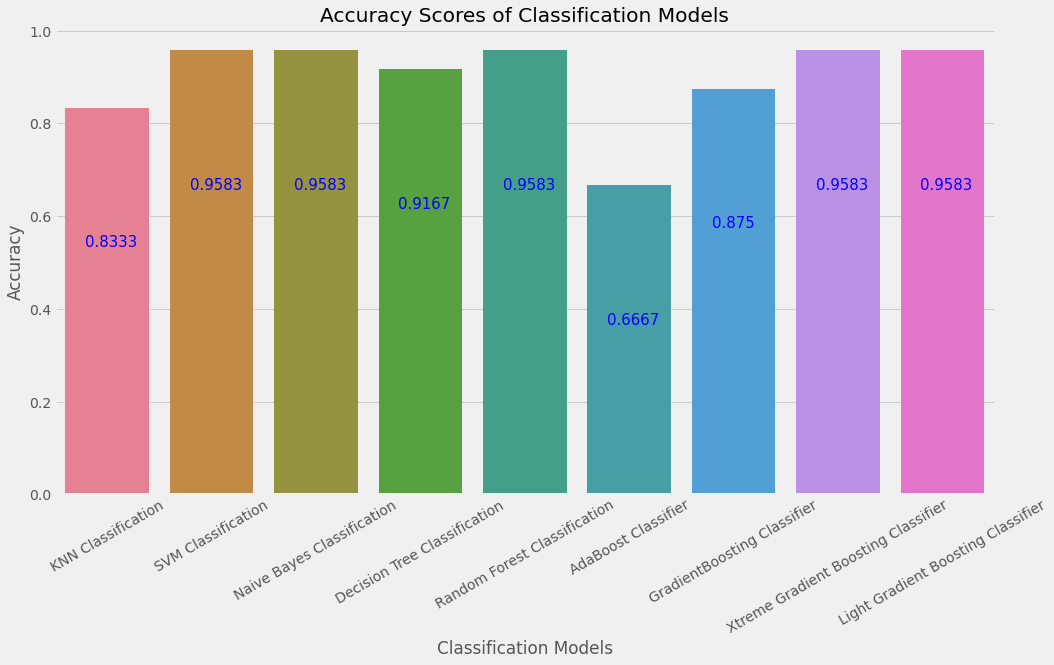

In [101]:
#Accuracy
plt.figure(figsize=(15,8))
ax= sns.barplot(x=df_1.Model, y=df_1.Accuracy, palette =sns.color_palette("husl", 9) )
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.style.use('seaborn-dark-palette')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Classification Models')
for i in ax.patches:
    ax.text(i.get_x()+.19, i.get_height()-0.3, \
            str(round((i.get_height()), 4)), fontsize=15, color='b')
plt.show()
#sns.cubehelix_palette(len(df_1.Model)